# Problem Set 0

In [2]:
# General package import for all PS1

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

## Exercise 1
### Exercise 1a: 
#### Convert the list into a 3 × 3 matrix (2-d array). The outcome should be the matrix

In [3]:
l1 = [2,5,6,4,5,9,3,2,2] # Define array
A = np.reshape(l1, (3, 3)) # Define 3x3 matrix and fit l1 array values into it
print('A =\n', A) # '\n' breaks the line - similar to LaTeX. Makes it look neater

A =
 [[2 5 6]
 [4 5 9]
 [3 2 2]]


### Exercise 1b: 
#### Find the maximum of the matrix A. Find the index of the maximum.

In [7]:
max_A = np.max(A) # numpy.max to find maximum in (matrix) A
print('The maximum value in the matrix A is', max_A)

index_A = np.argmax(A) # gives us the "indices of the maximum value along an axis" (this essentially puts the matrix in a line, and tells us the position of the maximum argument in out matrix line)
index_A_max = np.unravel_index(index_A, A.shape)
print('The index of the maximum value within matrix A in A is situated at', index_A_max) # Recall that in Python (0,0) would be the first cell.

The maximum value in the matrix A is 9
The index of the maximum value within matrix A in A is situated at (1, 2)


### Exercise 1c: 
#### Transpose the matrix A

In [8]:
A_transposed = np.transpose(A)
print("""A' =\n""", A_transposed)

A' =
 [[2 4 3]
 [5 5 2]
 [6 9 2]]


### Exercise 1d: 
#### Squared the matrix (i.e. AA′). Also, raise to the power of 2 all the elements in matrix A.

In [11]:
A_A_transposed = A @ A_transposed # Using '@' to multiple matrices as a whole
print("""AA' =\n""", A_A_transposed) 

A_squared = A**2 # Square every element of the matrix
print('Matrix with individual elements squared:\n', A_squared)

AA' =
 [[ 65  87  28]
 [ 87 122  40]
 [ 28  40  17]]
Matrix with individual elements squared:
 [[ 4 25 36]
 [16 25 81]
 [ 9  4  4]]


### Exercise 1e: 
#### Compute the eigenvalues of matrix A.

In [12]:
A_eigen = np.linalg.eigvals(A) 
print('Eigenvalues of matrix A:', A_eigen)

Eigenvalues of matrix A: [11.93968476+0.j         -1.46984238+0.96874799j -1.46984238-0.96874799j]


### Exercise 1f: 
#### Multiply matrix A by a matrix of zeros (f1), by the identity matrix (f2),and by a matrix of ones (f3).

In [14]:
A_zeros = A @ np.zeros((3,3)) # Again, using '@' to multiply matrices as a whole
print('Matrix A multiplied by a matrix of zeros:\n', A_zeros)

A_identity = A @ np.identity(3)
print('\nMatrix A multiplied by an identity matrix:\n', A_identity)

A_ones = A @ np.ones((3,3))
print('\nMatrix A multiplied by a matrix of zeros:\n', A_ones)

Matrix A multiplied by a matrix of zeros:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Matrix A multiplied by an identity matrix:
 [[2. 5. 6.]
 [4. 5. 9.]
 [3. 2. 2.]]

Matrix A multiplied by a matrix of zeros:
 [[13. 13. 13.]
 [18. 18. 18.]
 [ 7.  7.  7.]]


### Exercise 1g: 
#### Create an even grid from 1 to 9 with 9 elements. Convert the grid into a 3x3 matrix called B. Multiply matrix A by matrix B.

In [177]:
even_grid = np.linspace(1, 9, 9) # This is an even grid from 1 to 9 with 9 elements - this is their order into the linspace function
B = np.reshape(even_grid, (3, 3))

A_B = A @ B # matrix multiplication
print('AB =\n', A_B)

AB =
 [[ 64.  77.  90.]
 [ 87. 105. 123.]
 [ 25.  32.  39.]]


## Exercise 2
### Exercise 2a:
#### Create a new list that contains only the elements in list l1 that are smaller than 5.

In [15]:
l1_below = [a for a in l1 if a < 5]
print('New list of elements containing only those values in l1 that are <5:', l1_below)

New list of elements containing only those values in l1 that are <5: [2, 4, 3, 2, 2]


### Exercise 2b: 
#### Create a new list that contains only the elements in list l1 bigger or equal than 3 and smaller than 7.

In [23]:
l1_between = [a for a in l1 if 3 <= a < 7]
print('New list of elements containing only those values in l1 that are <=3 and <5:', l1_between)

New list of elements containing only those values in l1 that are <=3 and <5: [5, 6, 4, 5, 3]


### Exercise 2c:
#### Given matrix A from exercise 2, write a code that checks whether 5 belongs to A.

In [31]:
if 5 in A:
    print("Yes, 5 does belong to A")
else:
    print("No, 5 doesn't belong to A")
    
# You could also write this as "5 in A", this will return a boolean value of True or False for whether the value is contained in the matrix or not.

Yes, 5 does belong to A


### Exercise 2d:
#### Create a new matrix B that is equal to matrix A but where numbers below 4 are replaced by zeros.

In [35]:
new_matrix_B = np.where(A < 4, 0, A) # Essentially states "where A < 4, give us 0, otherwise give us the value from A"
print('New matrix B =\n', new_matrix_B)

New matrix B =
 [[0 5 6]
 [4 5 9]
 [0 0 0]]


### Exercise 2e:
#### Write a code that counts the number of zeros in matrix B.

In [40]:
zeros_in_B = np.count_nonzero(new_matrix_B == 0) # This will count the boolean values of true(=1 in boolean terms), which we have set for when the values in B are 0
print('There are', zeros_in_B,'zeros in matrix B')

There are 4 zeros in matrix B


## Exercise 3
### Exercise 3a:
#### Create a function that given the arguments K, L, A, α, σ, returns output Y. You can have inside the function an if statement for when σ = 1 the output Y comes from Cobb-Douglass production function, else from the CES function.

In [14]:
## Define for when K = 0 (This is needed for part d)
def K_func(K): # This is to set the value to 'very small' as opposed to 0 when it should infact be 0 so as to not break the model
    if K < 0.0000001:
        K_term = 1e-10
    else:
        K_term = K
    return K_term

def ces_production_function(K, L, A, alpha, sigma): # Essentially, when sigma = 1, Cobb-Douglas, otherwise, it is the standard CES production function
    if sigma == 1:
        # Cobb-Douglas case
        return A * K_func(K)**alpha * L**(1 - alpha) 
    else:
        # CES case
        power = (sigma-1)/sigma
        return A * (alpha * K_func(K)**power + ((1 - alpha) * L**power))**(1/power)

# K_term = K_func(K)


### Exercise 3b:
From now on work with the following parameterization: A = 1.5, α = 0.33.

#### Cobb-Douglass production function. First consider the Cobb-Douglass case with σ = 1. Compute output Y for an even-spaced grid of K, Gk = {0,1,2,3,4,5,6,7,8,9,10}, and a fixed L = 3. Plot the resuls—make an x-y plot with the grid of K in the x axis and output Y in the axis y.

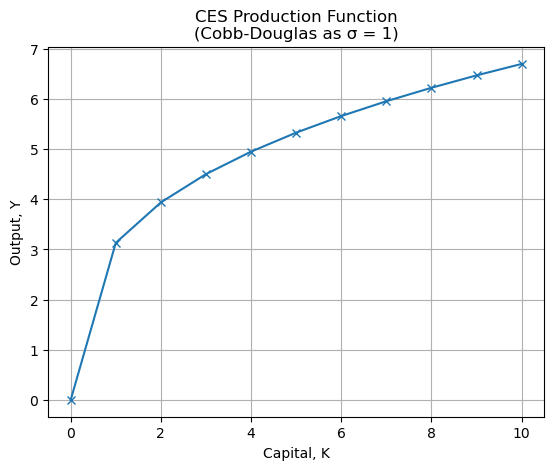

In [15]:
# Set values
A = 1.5
alpha = 0.33
L = 3
sigma = 1 # From this, we expect to use the Cobb-Douglas function

# set 11 K values between 0 and 10
K_values = np.linspace(0,10,11)


Y_values = [ces_production_function(K, L, A, alpha, sigma) for K in K_values]
            
# Plot setup
plt.plot(K_values, Y_values, marker='x') 
plt.xlabel('Capital, K')
plt.ylabel('Output, Y')
plt.title('CES Production Function\n(Cobb-Douglas as σ = 1)') 
plt.grid(True) 
plt.show()

### Exercise 3c:
#### From b, recompute output Y for the 3 cases α=0.25, α=0.5, α=0.75. Make an x−y plot with the 3 production functions in the same graph.

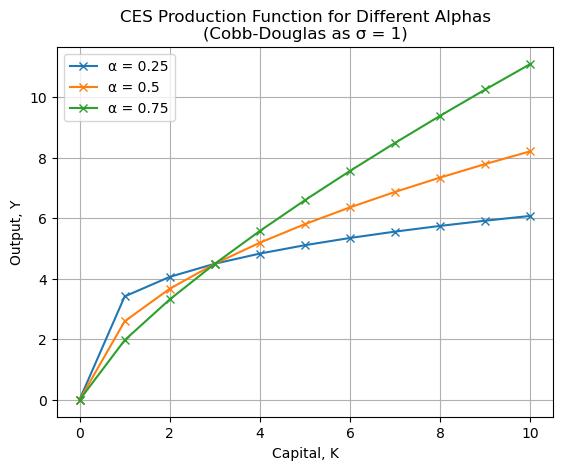

In [16]:
alpha_values = [0.25, 0.5, 0.75] # Can take multiple values

for alpha in alpha_values:
    Y_values = [ces_production_function(K, L, A, alpha, sigma) for K in K_values] # Plugs the different alphas into the CES production function
    plt.plot(K_values, Y_values, marker='x', label=f'α = {alpha}') # The f allows the "{alpha}" to take their respective values

# Plot values
plt.legend()
plt.grid(True)
plt.title('CES Production Function for Different Alphas\n(Cobb-Douglas as σ = 1)')
plt.xlabel('Capital, K')
plt.ylabel('Output, Y')
plt.show()

### Exercise 3d:
#### CES production function. Redo exercise b but for σ = 0.33.

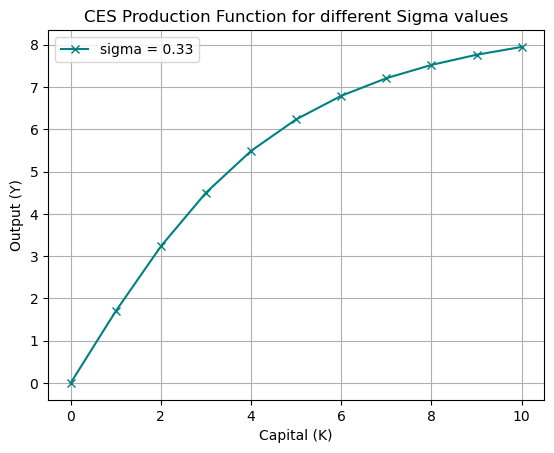

In [17]:
sigma = 0.33

Y_values = [ces_production_function(K, L, A, alpha, sigma) for K in K_values] 
plt.plot(K_values, Y_values, marker = 'x', color = 'teal', label=f'sigma = {sigma}')

# Plot values
plt.xlabel('Capital (K)')
plt.ylabel('Output (Y)')
plt.legend()
plt.grid(True)
plt.title('CES Production Function for different Sigma values') 
plt.show()

### Exercise 3e:
#### Keeping α = 0.33, plot output Y vs the grid of capital for the cases of σ = 0.25,σ = 0.5,σ = 1, σ = 2, σ = 4.

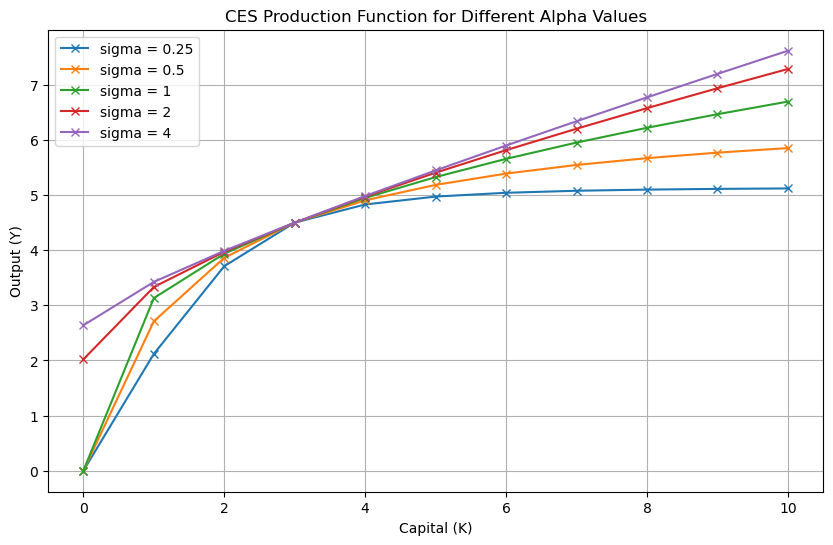

In [19]:
# Plotting the graph for each alpha
plt.figure(figsize=(10, 6))
alpha = 0.33

sigma_values = [0.25, 0.5, 1, 2, 4]
for sigma in sigma_values:
    Y_values = [ces_production_function(K, L, A, alpha, sigma) for K in K_values]
    plt.plot(K_values, Y_values, marker='x', label=f'sigma = {sigma}')

plt.legend()
plt.grid(True)
plt.title('CES Production Function for Different Alpha Values')
plt.xlabel('Capital (K)')
plt.ylabel('Output (Y)')
plt.show()

### Exercise 3f:
#### How does output Y changes along K for the different σ specifications? Can you provide the economic interpretation? Hint: σ captures the relative degree of substitutability/complementarity between the two inputs K, L.

As $σ \rightarrow \infty$, using L'Hôpital's rule:  $$\frac{\sigma-1}{\sigma} \rightarrow 1 ; \frac{\sigma}{\sigma-1} \rightarrow 1$$

 We thus get the following result when we substitute in our values for $A, \alpha, L$:

\begin{align*}
Y &= A(\alpha K + (1-\alpha)L) \\
Y &= A \alpha K + A(1-\alpha)L \\
Y &= 1.5(0.33K) + 1.5(1-0.33)3 \\
Y & \approx \frac{1}{2}K + 3
\end{align*}

This gives us an increasing, while marginally-diminishing, function for Y in terms of K, when $K \ge 0$. Recall $A, \alpha, \sigma > 0$. This shows us how increasing $\sigma$ increases the level of output for any particular value of K. It also changes the relative degree of complementarity with the level of technology, A.

## Exercise 4
### Exercise 4a:
#### Solow growth model: What is the steady state capital per worker and output per worker in the economy?

Steady state where $k_{t+1} = k_{t}$. 

In the SS, $k_{t+1} = k_t$.

In [25]:
# Set values
alpha = 0.3
delta = 0.7
A = 4
s = 0.4

k_star = (((s * A) / delta) ** (1 / (1 - alpha)))
y_star = A * k_star**alpha

print("The steady state output per worker, y*, is", np.round(y_star, 3))
print("The steady state capital per worker, k*, is", np.round(k_star, 3))

The steady state output per worker, y*, is 5.701
The steady state capital per worker, k*, is 3.258


### Exercise 4b:

#### Suppose the economy in the first three periods, t = 0 to t = 2, is in steady state. Then, at period t = 3 the economy experiences a permanent negative shock such that A decreases by 25 percent. Compute and plot the levels of capital per worker and output per worker from period t = 0 till the economy reaches the new steady state. Use a tolerance level of ε = 0.5 to find convergence to the new steady state.

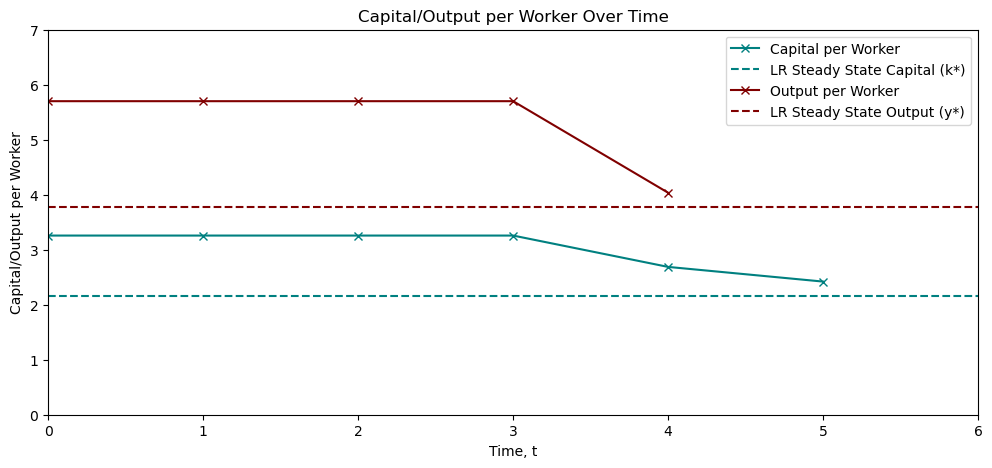

The steady state output per worker, y*, after the shock in A is 3.78
The steady state capital per worker, k*, after the shock in A is 2.16


In [32]:
# Set values that change, invariant values remain from the previous question
A_shock = A * 0.75
tolerance = 0.5  # Tolerance level for convergence

def capital(A, s, alpha, delta, k):
    return s * A * k**alpha + (1 - delta) * k

# Set values into list(s) using square brackets
capital_per_worker = [k_star]
output_per_worker = [A * k_star**alpha]


# Steady states in the long run given the shock
LR_k_star = ((s * A_shock) / delta) ** (1 / (1 - alpha))
LR_y_star = A_shock * LR_k_star**alpha

# Set bool values to false to allow the following while function to run
k_within_tolerance = False
y_within_tolerance = False

# Set for different ranges -> 0 <= t <= 2 and t >= 2. Append function fixes the values at different values into the list previously created
t = 0
while not (k_within_tolerance and y_within_tolerance):
    if t <= 2:
        capital_per_worker.append(k_star)
        output_per_worker.append(A * k_star**alpha)
    else:
        # For capital to terminate when within tolerance
        if not k_within_tolerance:
            k_star_shock = capital(A_shock, s, alpha, delta, capital_per_worker[-1])
            capital_per_worker.append(k_star_shock)
            if abs(k_star_shock - LR_k_star) < tolerance:
                k_within_tolerance = True
        # For output to terminate when wtihin tolerance
        if not y_within_tolerance:
            y_star_shock = A_shock * k_star_shock**alpha
            output_per_worker.append(y_star_shock)
            if abs(y_star_shock - LR_y_star) < tolerance:
                y_within_tolerance = True
    t = t + 1

# Plot values
plt.figure(figsize=(12, 5)) # This makes it a set size (more aesthetic)
plt.title('Capital/Output per Worker Over Time')
plt.xlabel('Time, t')
plt.ylabel('Capital/Output per Worker')

plt.plot(capital_per_worker, marker='x', color = 'teal', label='Capital per Worker')
plt.axhline(LR_k_star, color = 'teal', linestyle='--', label='LR Steady State Capital (k*)')

plt.plot(output_per_worker, marker='x', color = 'maroon', label='Output per Worker')
plt.axhline(LR_y_star, color = 'maroon', linestyle='--', label='LR Steady State Output (y*)')

plt.legend()
plt.ylim(0,7)
plt.xlim(0, 6)
plt.show()


print("The steady state output per worker, y*, after the shock in A is", np.round(LR_y_star, 3))
print("The steady state capital per worker, k*, after the shock in A is", np.round(LR_k_star, 3))


Accounting for the tolerance level, the output per worker, y, falls within the tolerance, where $\epsilon = 0.5$, of the steady state output per worker, $y^*$, at $t = 3$. However, capital per worker only falls within the tolerance level of its respective steady state of capital per worker, $k^*$, at $t = 4$.

### Exercise 4c:
#### Consider the economy is in the original steady state with A = 4 from period t = 0 to period t = 2. Then, from period t = 3 to t = 10 the economy experiences a temporary shock that leads the saving rates up to s = 0.6 and after period t = 10 the saving rate goes back to s = 0.4. Compute and plot the output per worker level from period t = 0 to period t = 100. Explain how a temporary change in the savings rate affects output.

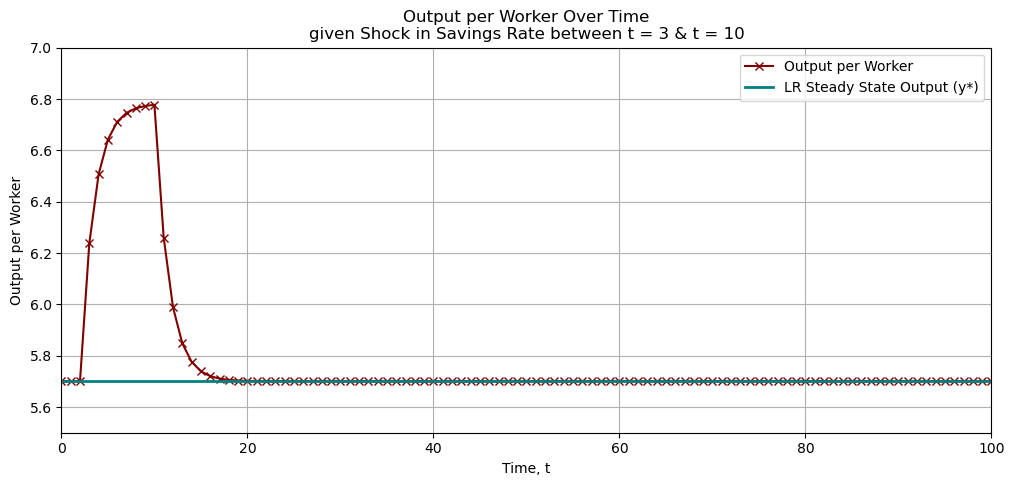

In [50]:
# Reset parameters (did all of them to protect against amendments made in 4a and 4b)
alpha = 0.3
delta = 0.7
A = 4
s = 0.4
s_jump = 0.6

# Reset k*
k_star = ((s * A) / delta) ** (1 / (1 - alpha))

# Create list to store values
k_savings_shock = [k_star]
y_savings_shock = [A * k_star**alpha]

# Periods t = 0 to t = 2 -> s begins at 0.4
for t in range(0,2):
    k_savings_before_shock = capital(A, s, alpha, delta, k_savings_shock[-1]) # Recall capital function from part b, this has not changed
    k_savings_shock.append(k_savings_before_shock)
    y_savings_shock.append(A * k_savings_before_shock**alpha)

# Periods t = 3 to t = 10 -> s jumps to 0.6
for t in range(3, 11):
    k_savings_during_shock = capital(A, s_jump, alpha, delta, k_savings_shock[-1]) # use s_jump as opposed to s of course
    k_savings_shock.append(k_savings_during_shock)
    y_savings_shock.append(A * k_savings_during_shock**alpha)

# Periods t = 11 to t = 100 -> s returns to 0.4
for t in range(11,101):
    k_savings_after_shock = capital(A, s, alpha, delta, k_savings_shock[-1])
    k_savings_shock.append(k_savings_after_shock)
    y_savings_shock.append(A * k_savings_after_shock**alpha)

# Long-run values (capital is obviously needed as an input into output per capital, y)
LR_k_star = (((s * A) / delta)**(1 / (1 - alpha)))
LR_y_star = A * LR_k_star**alpha

# Plot values
plt.figure(figsize=(12, 5)) # This makes the plot a set size (more aesthetic)
plt.plot(y_savings_shock, marker='x', color = 'maroon', label='Output per Worker')
plt.axhline(LR_y_star, color = 'teal', linewidth = 2, label='LR Steady State Output (y*)')
plt.title('Output per Worker Over Time\ngiven Shock in Savings Rate between t = 3 & t = 10')
plt.xlabel('Time, t')
plt.ylabel('Output per Worker')

plt.legend()
plt.grid(True)

plt.ylim(5.5, round(max(output_per_worker_savings_shock))) # This I just wanted to test, but it just sets the height of the y-axis to the next integer) 
plt.xlim(0, 100)


plt.show()

A temporary change in the savings rate between t = 3 and t = 10 results in an increase in the output per worker. The drop back to the inital level of savings of s = 0.4 again at t = 11 then results in a fall in the output per worker again, falling within c.10 periods to its inital -- and steady state -- level of output per worker.